In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 

In [2]:
dataset = pd.read_csv('./data/fer2013/fer2013.csv')

In [3]:
dataset.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
dataset.shape

(35887, 3)

In [7]:
emotion.shape

(35887,)

In [6]:
emotion = dataset['emotion'].values

In [8]:
pixels = dataset['pixels']


In [9]:
pic = np.zeros((1,2304))


In [10]:
pic = np.zeros((1,2304))
for i in range(len(pixels)):
    pix = pixels[i].split(' ')
    image = np.array([[]])
    for j in range(len(pix)):
        image = np.append(image,int(pix[j]))
        image = image.reshape(1,-1)
        
    pic = np.append(pic,image,axis = 0)

In [11]:
X = pic[1:,:]
print('No. of images: %r'%X.shape[0])

No. of images: 35887


In [13]:
emotion.shape

(35887,)

In [14]:
emotion

array([0, 0, 2, ..., 0, 3, 2], dtype=int64)

In [15]:
emotion = emotion.reshape(-1,1)
print('No. of labels %r'%emotion.shape[0])

No. of labels 35887


In [16]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

In [17]:
y = onehotencoder.fit_transform(emotion).toarray()

In [18]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [19]:
from sklearn.cross_validation import train_test_split

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((28709, 2304), (7178, 2304))

In [21]:
np.savez('Emotion_database', X_train, X_test, y_train, y_test)

In [22]:
img = X_train[100:101].reshape((48,48))

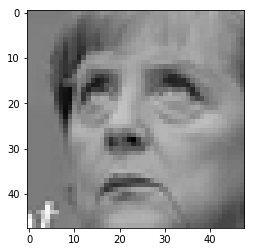

In [23]:
plt.imshow(img, cmap= 'gray')

In [24]:
X_train

array([[169., 171., 176., ...,   2.,  55., 155.],
       [ 54.,  58.,  45., ..., 246., 244., 237.],
       [253., 255., 232., ..., 254., 254., 254.],
       ...,
       [ 60.,  61.,  64., ...,  61.,  58.,  65.],
       [110., 125., 133., ..., 151., 158., 167.],
       [ 27.,  30.,  33., ..., 246.,  76.,   0.]])

In [25]:
image = cv2.imread('test3.jpg',0)

In [26]:
image

array([[237, 237, 237, ...,  57,  56,  55],
       [237, 237, 237, ...,  56,  55,  54],
       [237, 237, 237, ...,  55,  53,  52],
       ...,
       [102,  96,  89, ...,   4,   4,   4],
       [102,  92,  84, ...,   3,   3,   3],
       [ 96,  86,  77, ...,   3,   3,   3]], dtype=uint8)

In [ ]:
cv2.imshow('img',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
plt.imshow(image, cmap ='gray')